# Movies Prediction using Machine Learning Algorithm

# Import Libraries Required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
plt.rcParams.update({'font.size': 12})
# global option settings
pd.set_option('display.max_columns', None) # show all column names display
pd.set_option('display.max_rows', None) # show all rows on display

# Import Movies Dataset and Store it in Dataframe

In [2]:
dfMovies = pd.read_csv("movies.dat",sep="::",names=["MovieID","Title","Genres"],engine='python')
dfMovies.head()

MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

# Import Ratings Dataset and Store it in Dataframe

In [3]:
dfRatings = pd.read_csv("ratings.dat",sep="::",names=["UserID","MovieID","Rating","Timestamp"],engine='python')
dfRatings.head()

UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

# Import Users Dataset and Store it in Dataframe

In [4]:
dfUsers = pd.read_csv("users.dat",sep="::",names=["UserID","Gender","Age","Occupation","Zip-code"],engine='python')
dfUsers.head()

UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455

In [5]:
#Checking shape of movies
dfMovies.shape

(3883, 3)

In [6]:
#Checking shape of Ratings 
dfRatings.shape

(1000209, 4)

In [7]:
#Checking shape of Users
dfUsers.shape

(6040, 5)

# Merging Movies Dataset with Rating dataset

In [8]:
#Merge Movies with Ratings
dfMovieRatings = dfMovies.merge(dfRatings,on='MovieID',how='inner')
dfMovieRatings.head()

MovieID             Title                       Genres  UserID  Rating  \
0        1  Toy Story (1995)  Animation|Children's|Comedy       1       5   
1        1  Toy Story (1995)  Animation|Children's|Comedy       6       4   
2        1  Toy Story (1995)  Animation|Children's|Comedy       8       4   
3        1  Toy Story (1995)  Animation|Children's|Comedy       9       5   
4        1  Toy Story (1995)  Animation|Children's|Comedy      10       5   

   Timestamp  
0  978824268  
1  978237008  
2  978233496  
3  978225952  
4  978226474

In [9]:
# to check whether merging does not changes any dataset
dfMovieRatings.shape

(1000209, 6)

# Merging Movies, Ratings and Users Dataset

In [10]:
#Merge Movies, Ratings and Users
dfMaster = dfMovieRatings.merge(dfUsers,on="UserID",how='inner')
dfMaster.head()

MovieID                                      Title  \
0        1                           Toy Story (1995)   
1       48                          Pocahontas (1995)   
2      150                           Apollo 13 (1995)   
3      260  Star Wars: Episode IV - A New Hope (1977)   
4      527                    Schindler's List (1993)   

                                 Genres  UserID  Rating  Timestamp Gender  \
0           Animation|Children's|Comedy       1       5  978824268      F   
1  Animation|Children's|Musical|Romance       1       5  978824351      F   
2                                 Drama       1       5  978301777      F   
3       Action|Adventure|Fantasy|Sci-Fi       1       4  978300760      F   
4                             Drama|War       1       5  978824195      F   

   Age  Occupation Zip-code  
0    1          10    48067  
1    1          10    48067  
2    1          10    48067  
3    1          10    48067  
4    1          10    48067

In [11]:
dfMaster.shape

(1000209, 10)

# Check Information in dataset

In [12]:
dfMaster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Timestamp   1000209 non-null  int64 
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  int64 
 8   Occupation  1000209 non-null  int64 
 9   Zip-code    1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [13]:
#descriptive statistics
dfMaster.describe()

MovieID        UserID        Rating     Timestamp           Age  \
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06   
mean   1.865540e+03  3.024512e+03  3.581564e+00  9.722437e+08  2.973831e+01   
std    1.096041e+03  1.728413e+03  1.117102e+00  1.215256e+07  1.175198e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00  9.567039e+08  1.000000e+00   
25%    1.030000e+03  1.506000e+03  3.000000e+00  9.653026e+08  2.500000e+01   
50%    1.835000e+03  3.070000e+03  4.000000e+00  9.730180e+08  2.500000e+01   
75%    2.770000e+03  4.476000e+03  4.000000e+00  9.752209e+08  3.500000e+01   
max    3.952000e+03  6.040000e+03  5.000000e+00  1.046455e+09  5.600000e+01   

         Occupation  
count  1.000209e+06  
mean   8.036138e+00  
std    6.531336e+00  
min    0.000000e+00  
25%    2.000000e+00  
50%    7.000000e+00  
75%    1.400000e+01  
max    2.000000e+01

In [14]:
#Print column names
print(dfMaster.columns.tolist())

['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender', 'Age', 'Occupation', 'Zip-code']


In [15]:
#check the datatypes
dfMaster.dtypes

MovieID        int64
Title         object
Genres        object
UserID         int64
Rating         int64
Timestamp      int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

# Data Cleaning

In [16]:
# Dropping columns
columns_to_drop=['Timestamp','Zip-code']
dfMaster.drop(columns_to_drop, axis=1, inplace=True)

In [17]:
dfMaster.head()

MovieID                                      Title  \
0        1                           Toy Story (1995)   
1       48                          Pocahontas (1995)   
2      150                           Apollo 13 (1995)   
3      260  Star Wars: Episode IV - A New Hope (1977)   
4      527                    Schindler's List (1993)   

                                 Genres  UserID  Rating Gender  Age  \
0           Animation|Children's|Comedy       1       5      F    1   
1  Animation|Children's|Musical|Romance       1       5      F    1   
2                                 Drama       1       5      F    1   
3       Action|Adventure|Fantasy|Sci-Fi       1       4      F    1   
4                             Drama|War       1       5      F    1   

   Occupation  
0          10  
1          10  
2          10  
3          10  
4          10

In [18]:
#checking missing values
dfMaster.isna().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Gender        0
Age           0
Occupation    0
dtype: int64

# Normalizing Ratings

In [19]:
#Normalizing between 0 to 1
#cols_to_norm = ['Rating']
#dfRatings[cols_to_norm] = dfRatings[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [20]:
dfRatings.head()

UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

In [21]:
#Merge Movies with Ratings after Normalization
dfMovieRatings = dfMovies.merge(dfRatings,on='MovieID',how='inner')
dfMaster = dfMovieRatings.merge(dfUsers,on="UserID",how='inner')
dfMaster.head()

MovieID                                      Title  \
0        1                           Toy Story (1995)   
1       48                          Pocahontas (1995)   
2      150                           Apollo 13 (1995)   
3      260  Star Wars: Episode IV - A New Hope (1977)   
4      527                    Schindler's List (1993)   

                                 Genres  UserID  Rating  Timestamp Gender  \
0           Animation|Children's|Comedy       1       5  978824268      F   
1  Animation|Children's|Musical|Romance       1       5  978824351      F   
2                                 Drama       1       5  978301777      F   
3       Action|Adventure|Fantasy|Sci-Fi       1       4  978300760      F   
4                             Drama|War       1       5  978824195      F   

   Age  Occupation Zip-code  
0    1          10    48067  
1    1          10    48067  
2    1          10    48067  
3    1          10    48067  
4    1          10    48067

# Gender convertion to Integer

In [22]:
# Replacing Male with 1
dfMaster['Gender'] = dfMaster.Gender.str.replace('M','1')

In [23]:
#Replacing Female with 0
dfMaster['Gender'] = dfMaster.Gender.str.replace('F','0')

In [24]:
#Updating in Master data
dfMaster['Gender'] = dfMaster.Gender.astype(int)

In [25]:
# Grouping Gender count
dfGender = dfMaster.groupby('Gender').size().sort_values(ascending=False)[:25]

In [26]:
dfGender.head()

Gender
1    753769
0    246440
dtype: int64

In [27]:
dfMaster.head()

MovieID                                      Title  \
0        1                           Toy Story (1995)   
1       48                          Pocahontas (1995)   
2      150                           Apollo 13 (1995)   
3      260  Star Wars: Episode IV - A New Hope (1977)   
4      527                    Schindler's List (1993)   

                                 Genres  UserID  Rating  Timestamp  Gender  \
0           Animation|Children's|Comedy       1       5  978824268       0   
1  Animation|Children's|Musical|Romance       1       5  978824351       0   
2                                 Drama       1       5  978301777       0   
3       Action|Adventure|Fantasy|Sci-Fi       1       4  978300760       0   
4                             Drama|War       1       5  978824195       0   

   Age  Occupation Zip-code  
0    1          10    48067  
1    1          10    48067  
2    1          10    48067  
3    1          10    48067  
4    1          10    48067

# Splitting Genres

In [28]:
#Splitting Genres based on | symbol
dfGenres = dfMaster
dfGenres = dfMaster['Genres'].str.split("|")

In [29]:
dfGenres.head()

0              [Animation, Children's, Comedy]
1    [Animation, Children's, Musical, Romance]
2                                      [Drama]
3         [Action, Adventure, Fantasy, Sci-Fi]
4                                 [Drama, War]
Name: Genres, dtype: object

In [30]:
listGenres = set()
for genre in dfGenres:
    listGenres = listGenres.union(set(genre))

In [31]:
listGenres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [32]:
# Performing Ratings one hot in Genres 
ratingsOneHot = dfMaster['Genres'].str.get_dummies("|")

In [33]:
dfMaster = pd.concat([dfMaster,ratingsOneHot],axis=1)

In [34]:
dfMaster.head()

MovieID                                      Title  \
0        1                           Toy Story (1995)   
1       48                          Pocahontas (1995)   
2      150                           Apollo 13 (1995)   
3      260  Star Wars: Episode IV - A New Hope (1977)   
4      527                    Schindler's List (1993)   

                                 Genres  UserID  Rating  Timestamp  Gender  \
0           Animation|Children's|Comedy       1       5  978824268       0   
1  Animation|Children's|Musical|Romance       1       5  978824351       0   
2                                 Drama       1       5  978301777       0   
3       Action|Adventure|Fantasy|Sci-Fi       1       4  978300760       0   
4                             Drama|War       1       5  978824195       0   

   Age  Occupation Zip-code  Action  Adventure  Animation  Children's  Comedy  \
0    1          10    48067       0          0          1           1       1   
1    1          10    48067       0          0          1           1       0   
2    1          10    48067       0          0          0           0       0   
3    1          10    48067       1          1          0           0       0   
4    1          10    48067       0          0          0           0       0   

   Crime  Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  \
0      0            0      0        0          0       0        0        0   
1      0            0      0        0          0       0        1        0   
2      0            0      1        0          0       0        0        0   
3      0            0      0        1          0       0        0        0   
4      0            0      1        0          0       0        0        0   

   Romance  Sci-Fi  Thriller  War  Western  
0        0       0         0    0        0  
1        1       0         0    0        0  
2        0       0         0    0        0  
3        0       1         0    0        0  
4        0       0         0    1        0

# Splitting Title and Year

In [35]:
dfMaster[["title","Year"]] = dfMaster.Title.str.extract("(.)\s\((.\d+)",expand=True)

In [36]:
dfMaster = dfMaster.drop(columns=["title"])
dfMaster.head()

MovieID                                      Title  \
0        1                           Toy Story (1995)   
1       48                          Pocahontas (1995)   
2      150                           Apollo 13 (1995)   
3      260  Star Wars: Episode IV - A New Hope (1977)   
4      527                    Schindler's List (1993)   

                                 Genres  UserID  Rating  Timestamp  Gender  \
0           Animation|Children's|Comedy       1       5  978824268       0   
1  Animation|Children's|Musical|Romance       1       5  978824351       0   
2                                 Drama       1       5  978301777       0   
3       Action|Adventure|Fantasy|Sci-Fi       1       4  978300760       0   
4                             Drama|War       1       5  978824195       0   

   Age  Occupation Zip-code  Action  Adventure  Animation  Children's  Comedy  \
0    1          10    48067       0          0          1           1       1   
1    1          10    48067       0          0          1           1       0   
2    1          10    48067       0          0          0           0       0   
3    1          10    48067       1          1          0           0       0   
4    1          10    48067       0          0          0           0       0   

   Crime  Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  \
0      0            0      0        0          0       0        0        0   
1      0            0      0        0          0       0        1        0   
2      0            0      1        0          0       0        0        0   
3      0            0      0        1          0       0        0        0   
4      0            0      1        0          0       0        0        0   

   Romance  Sci-Fi  Thriller  War  Western  Year  
0        0       0         0    0        0  1995  
1        1       0         0    0        0  1995  
2        0       0         0    0        0  1995  
3        0       1         0    0        0  1977  
4        0       0         0    1        0  1993

In [37]:
dfMaster['Year'] = dfMaster.Year.astype(int)

In [38]:
dfMaster['Movie_Age'] = 2020 - dfMaster.Year
dfMaster.head(10)

MovieID                                      Title  \
0        1                           Toy Story (1995)   
1       48                          Pocahontas (1995)   
2      150                           Apollo 13 (1995)   
3      260  Star Wars: Episode IV - A New Hope (1977)   
4      527                    Schindler's List (1993)   
5      531                  Secret Garden, The (1993)   
6      588                             Aladdin (1992)   
7      594     Snow White and the Seven Dwarfs (1937)   
8      595                Beauty and the Beast (1991)   
9      608                               Fargo (1996)   

                                 Genres  UserID  Rating  Timestamp  Gender  \
0           Animation|Children's|Comedy       1       5  978824268       0   
1  Animation|Children's|Musical|Romance       1       5  978824351       0   
2                                 Drama       1       5  978301777       0   
3       Action|Adventure|Fantasy|Sci-Fi       1       4  978300760       0   
4                             Drama|War       1       5  978824195       0   
5                      Children's|Drama       1       4  978302149       0   
6   Animation|Children's|Comedy|Musical       1       4  978824268       0   
7          Animation|Children's|Musical       1       4  978302268       0   
8          Animation|Children's|Musical       1       5  978824268       0   
9                  Crime|Drama|Thriller       1       4  978301398       0   

   Age  Occupation Zip-code  Action  Adventure  Animation  Children's  Comedy  \
0    1          10    48067       0          0          1           1       1   
1    1          10    48067       0          0          1           1       0   
2    1          10    48067       0          0          0           0       0   
3    1          10    48067       1          1          0           0       0   
4    1          10    48067       0          0          0           0       0   
5    1          10    48067       0          0          0           1       0   
6    1          10    48067       0          0          1           1       1   
7    1          10    48067       0          0          1           1       0   
8    1          10    48067       0          0          1           1       0   
9    1          10    48067       0          0          0           0       0   

   Crime  Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  \
0      0            0      0        0          0       0        0        0   
1      0            0      0        0          0       0        1        0   
2      0            0      1        0          0       0        0        0   
3      0            0      0        1          0       0        0        0   
4      0            0      1        0          0       0        0        0   
5      0            0      1        0          0       0        0        0   
6      0            0      0        0          0       0        1        0   
7      0            0      0        0          0       0        1        0   
8      0            0      0        0          0       0        1        0   
9      1            0      1        0          0       0        0        0   

   Romance  Sci-Fi  Thriller  War  Western  Year  Movie_Age  
0        0       0         0    0        0  1995         25  
1        1       0         0    0        0  1995         25  
2        0       0         0    0        0  1995         25  
3        0       1         0    0        0  1977         43  
4        0       0         0    1        0  1993         27  
5        0       0         0    0        0  1993         27  
6        0       0         0    0        0  1992         28  
7        0       0         0    0        0  1937         83  
8        0       0         0    0        0  1991         29  
9        0       0         1    0        0  1996         24

In [39]:
# Checking Columns
dfMaster.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'Year', 'Movie_Age'],
      dtype='object')

In [40]:
# Master date in CSV
dfMaster.to_csv("Master.csv")

In [41]:
# Population count as per Occupation
dfMaster.Occupation.value_counts()

4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: Occupation, dtype: int64

# EXPLORATORY DATA ANALYSIS

# Explore Movie Titles

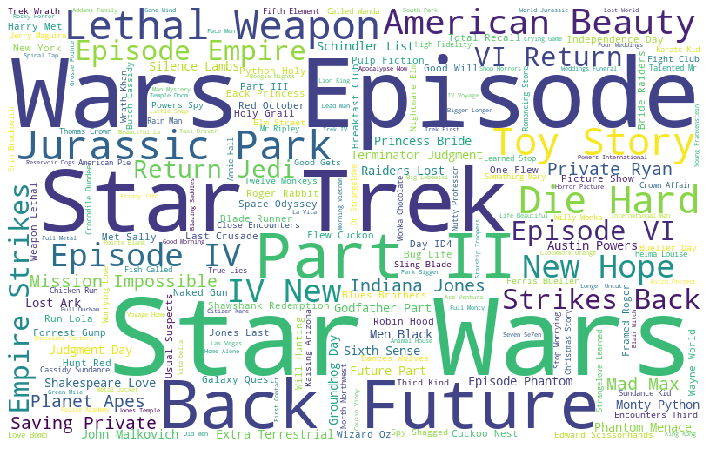

In [42]:
#plot a word cloud for all the Movie Title
from wordcloud import WordCloud
plt.subplots(figsize=(16,8))
wordcloud = WordCloud(background_color='white',width=800,height=500).generate(" ".join(dfMaster.Title))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

OCCUPATION VS USERS

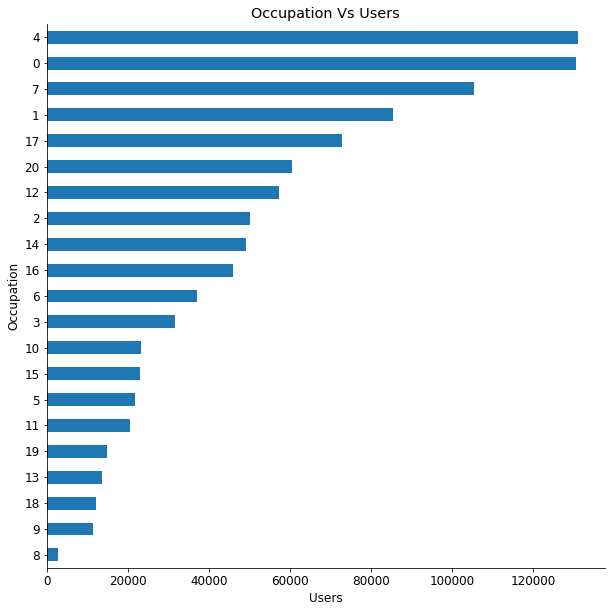

<Figure size 432x288 with 0 Axes>

In [43]:
#plot a barchart for the numberof Occupation
dfMaster['Occupation'].value_counts().sort_values().plot.barh(figsize=(10, 10));
sns.despine()
plt.xlabel("Users")
plt.ylabel("Occupation")
plt.title('Occupation Vs Users')
plt.show()
plt.savefig('OccupationVsUsers.png')

AGE GROUP VS USERS

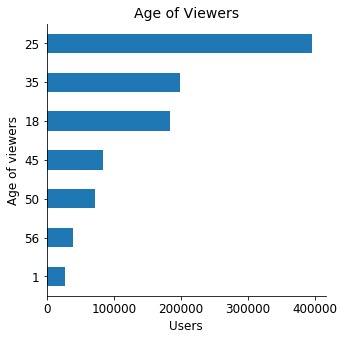

<Figure size 432x288 with 0 Axes>

In [44]:
#plot a barchart for the Age
dfMaster['Age'].value_counts().sort_values().plot.barh(figsize=(5, 5));
sns.despine()
plt.title('Age of Viewers', fontsize=14)
plt.xlabel("Users")
plt.ylabel("Age of viewers")
plt.show()
plt.savefig('AgeVsCount.png')

GENDER VS USERS

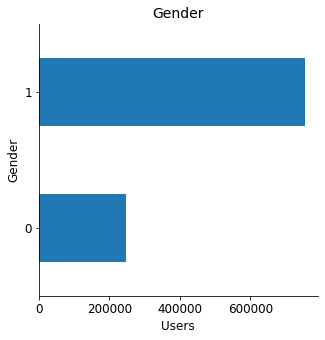

<Figure size 432x288 with 0 Axes>

In [45]:
#plot a barchart for the Gender participation
dfMaster['Gender'].value_counts().sort_values().plot.barh(figsize=(5, 5));
sns.despine()
plt.title('Gender', fontsize=14)
plt.xlabel("Users")
plt.ylabel("Gender")
plt.show()
plt.savefig('GenderVsCount.png')

In [46]:
#create a function to plot the count of different categorical values in different columns
def count_plot(column):
    plt.figure(figsize=(8,4))
    dfMaster[column].value_counts().plot(kind='bar', color=['crimson', 'darkcyan', 'darkslategray', 'darkorchid', 'dimgrey', 'olivedrab', 'orange', 'red', 'deepskyblue','salmon', 'dodgerblue', 'mediumvioletred'])
    plt.title(column)
    plt.xticks(rotation=0)
    plt.show()

OCCUPATION VS USERS

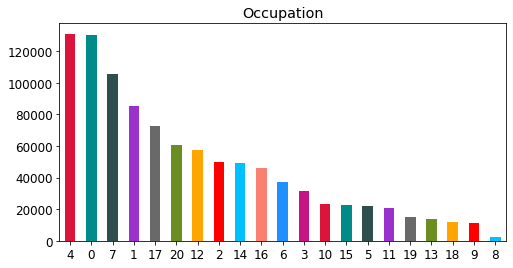

In [47]:
#plot the count of columns of all Occupation.
for col in ['Occupation']:
    count_plot(col)

GENDER DISTRIBUTION IN  OCCUPATION VS USERS

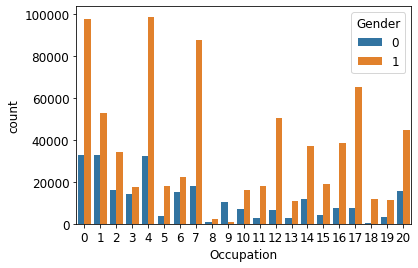

In [48]:
#plotting the count of different genres 
sns.countplot(x='Occupation',data=dfMaster,hue="Gender")

RATING DISTRIBUTION IN GENDER VS USERS

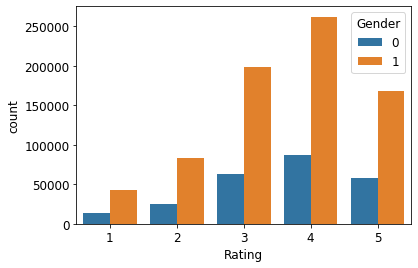

In [49]:
#plotting the count of different Rating
sns.countplot(x='Rating',data=dfMaster,hue="Gender")

OCCUPATION DISTRIBUTION WITH RATING 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


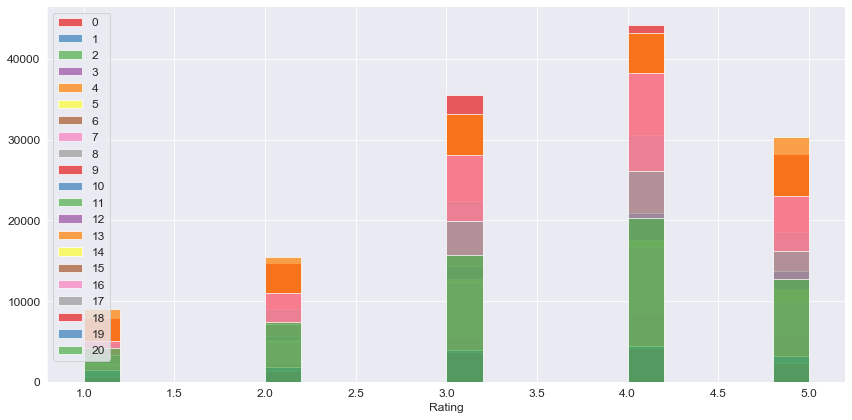

In [50]:
#Occupatin vs Rating
sns.set_style('darkgrid')
g = sns.FacetGrid(dfMaster,hue="Occupation",palette='Set1',size=6,aspect=2)
g = g.map(plt.hist,'Rating',bins=20,alpha=0.7)
plt.legend()


In [51]:
dfMaster.groupby('Rating').size()

Rating
1     56174
2    107557
3    261197
4    348971
5    226310
dtype: int64

VIEWERS VS RATINGS

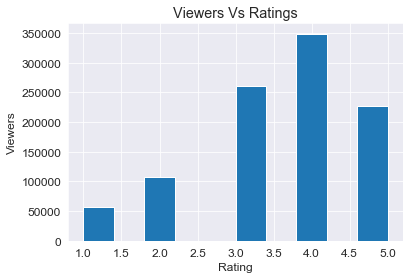

<Figure size 432x288 with 0 Axes>

In [52]:
plt.hist(x=dfMaster['Rating'])
plt.xlabel("Rating")
plt.ylabel("Viewers")
plt.title("Viewers Vs Ratings")
plt.show()
plt.savefig('Rating.png')

# Age Vs Rating

AGE PARTICIPATION IN RATING 

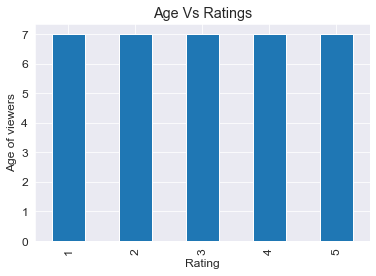

<Figure size 432x288 with 0 Axes>

In [53]:
dfMaster.groupby('Rating')['Age'].nunique().plot(kind='bar')
plt.xlabel("Rating")
plt.ylabel("Age of viewers")
plt.title("Age Vs Ratings")
plt.show()
plt.savefig('Age.png')

# Occupation Vs Rating

OCCUPATION PARTICIPATION IN RATING

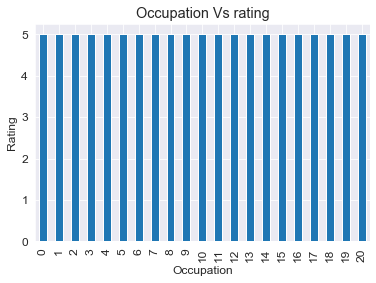

<Figure size 432x288 with 0 Axes>

In [54]:
dfMaster.groupby('Occupation')['Rating'].nunique().plot(kind='bar')
plt.xlabel("Occupation")
plt.ylabel("Rating")
plt.title("Occupation Vs rating")
plt.show()
plt.savefig('Occupation.png')

# Gender Vs Rating

GENDER PARTICIPATION IN RATING

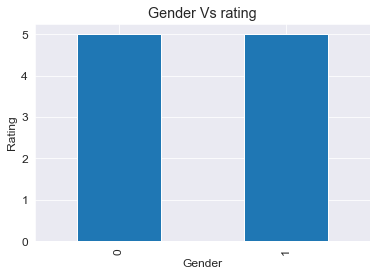

<Figure size 432x288 with 0 Axes>

In [55]:
dfMaster.groupby('Gender')['Rating'].nunique().plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Rating")
plt.title("Gender Vs rating")
plt.show()
plt.savefig('Gender.png')

# Age Distribution Analysis

In [56]:
# Users with Different Age Groups
dfMaster['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

USER AGE GROUP DISTRIBUTION VS USERS COUNT

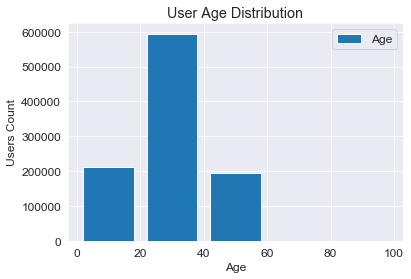

<Figure size 432x288 with 0 Axes>

In [57]:
dfMaster[['Age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()
plt.savefig('AgeDistribution.png')


USER AGE DISTRIBUTION VS USERS COUNT

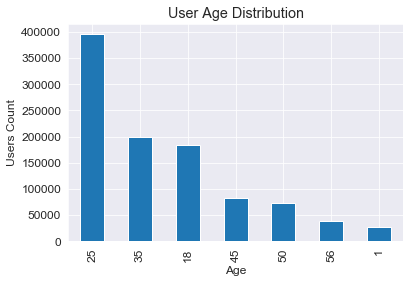

<Figure size 432x288 with 0 Axes>

In [58]:
# Plot for users with different age groups
dfMaster['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()
plt.savefig('AgeDistribution.png')

# Gender Analysis

In [59]:
gender_group = dfMaster.groupby('Gender').size()
gender_group

Gender
0    246440
1    753769
dtype: int64

# Users Vs Gender

# Rating Analysis

In [60]:
dfMaster.groupby('Rating').size()

Rating
1     56174
2    107557
3    261197
4    348971
5    226310
dtype: int64

RATING DISTRIBUTION IN AGE GROUP VS USERS COUNT

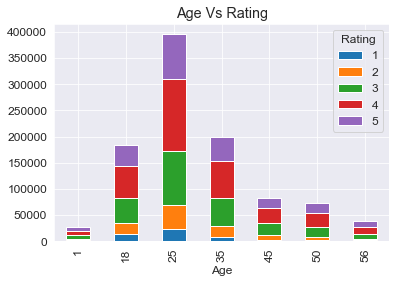

<Figure size 432x288 with 0 Axes>

In [61]:
dfMaster.groupby(['Age','Rating']).size().unstack().plot(kind='bar',stacked=True)
plt.title("Age Vs Rating")
plt.show()
plt.savefig('Age Vs Rating.png')

RATING DISTRIBUTION IN  GENDER VS USERS COUNT

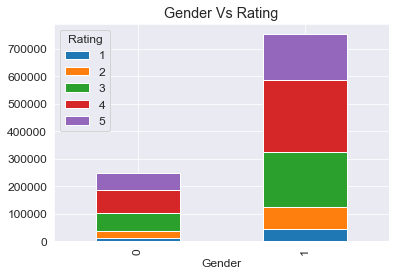

<Figure size 432x288 with 0 Axes>

In [62]:
dfMaster.groupby(['Gender','Rating']).size().unstack().plot(kind='bar',stacked=True)
plt.title("Gender Vs Rating")
plt.show()
plt.savefig('Gender Vs Rating.png')

RATING DISTRIBUTION IN  OCCUPATION GROUP VS COUNT

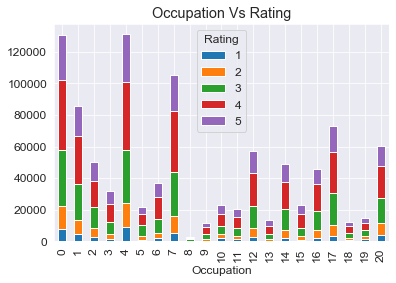

<Figure size 432x288 with 0 Axes>

In [63]:
dfMaster.groupby(['Occupation','Rating']).size().unstack().plot(kind='bar',stacked=True)
plt.title("Occupation Vs Rating")
plt.show()
plt.savefig('Occupation Vs Rating.png')

RATING DISTRIBUTION IN GENDER GROUP FOR HORROR MOVIE VS USERS COUNT

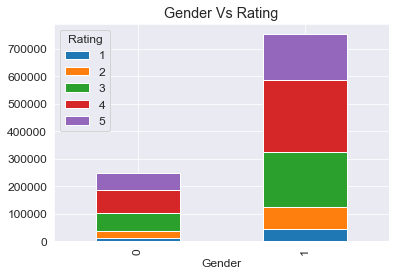

<Figure size 432x288 with 0 Axes>

In [64]:
dfMaster.groupby(['Gender','Rating']).size().unstack().plot(kind='bar',stacked=True)
plt.title("Gender Vs Rating")
plt.show()
plt.savefig('Gender VS Rating .png')

RATING DISTRIBUTION IN  GENDER GROUP FOR ALL GENRES VS USERS COUNT

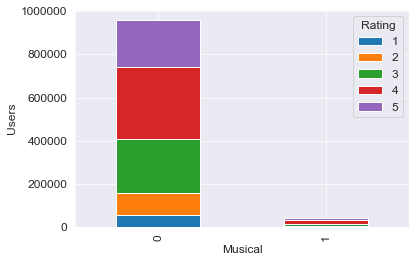

<Figure size 432x288 with 0 Axes>

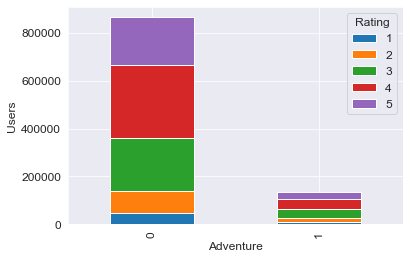

<Figure size 432x288 with 0 Axes>

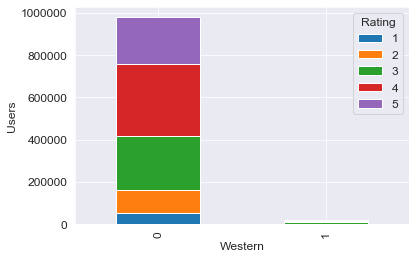

<Figure size 432x288 with 0 Axes>

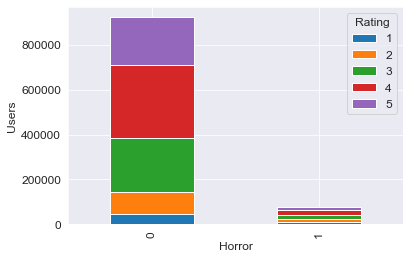

<Figure size 432x288 with 0 Axes>

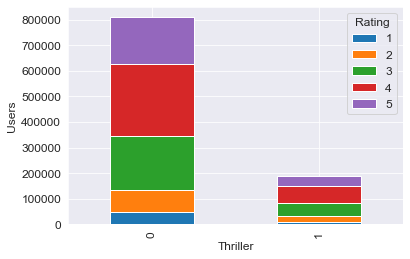

<Figure size 432x288 with 0 Axes>

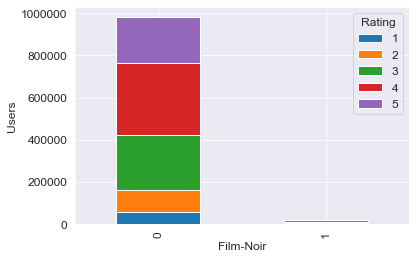

<Figure size 432x288 with 0 Axes>

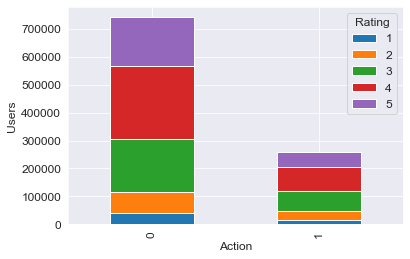

<Figure size 432x288 with 0 Axes>

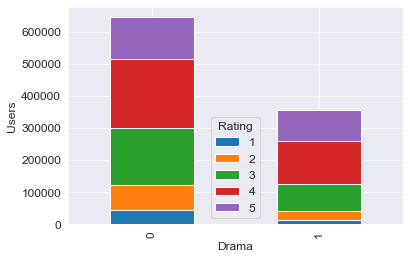

<Figure size 432x288 with 0 Axes>

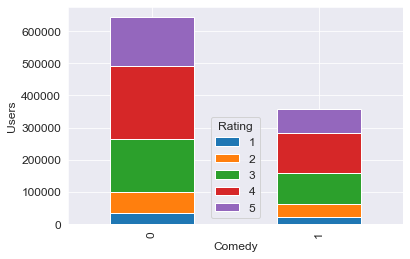

<Figure size 432x288 with 0 Axes>

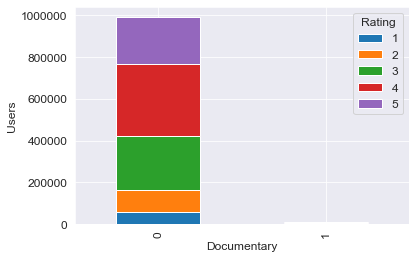

<Figure size 432x288 with 0 Axes>

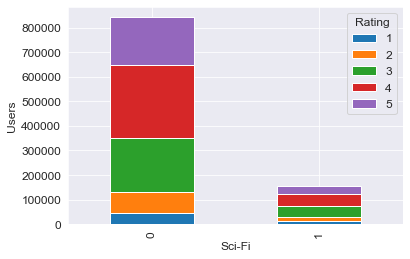

<Figure size 432x288 with 0 Axes>

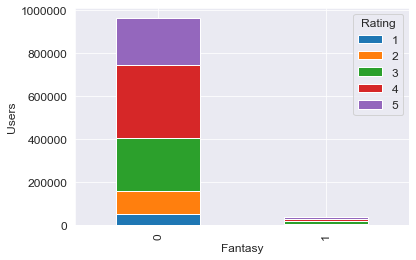

<Figure size 432x288 with 0 Axes>

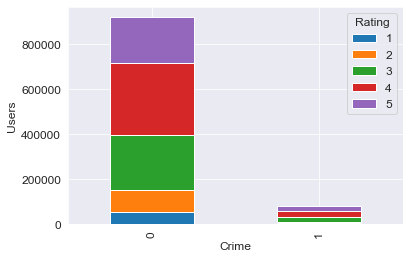

<Figure size 432x288 with 0 Axes>

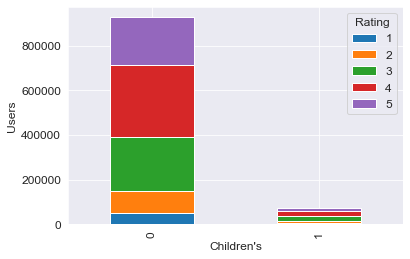

<Figure size 432x288 with 0 Axes>

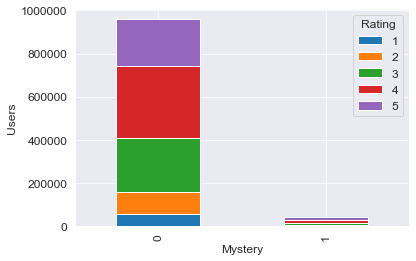

<Figure size 432x288 with 0 Axes>

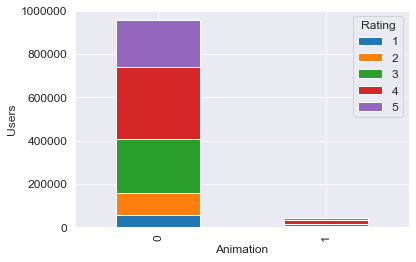

<Figure size 432x288 with 0 Axes>

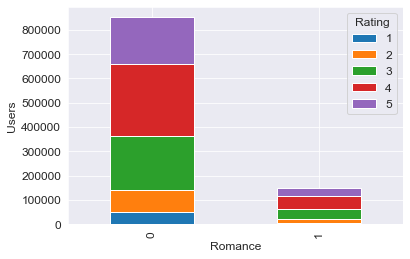

<Figure size 432x288 with 0 Axes>

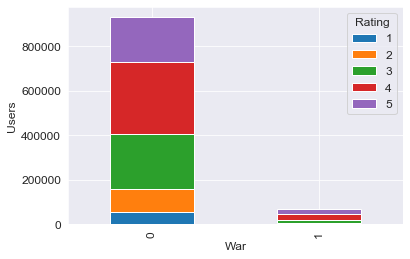

Happy Analysis


<Figure size 432x288 with 0 Axes>

In [65]:
listGenres
for i in listGenres:
    dfMaster.groupby([i,'Rating']).size().unstack().plot(kind='bar',stacked=True)
    plt.xlabel(i)
    plt.ylabel("Users")
    plt.show()
    plt.savefig('i Vs Rating.png')
    i=i+str(1)
print("Happy Analysis")

RATING CONTRIBUTION IN EVERY OCCUPATION 

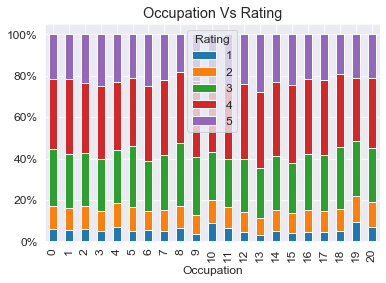

In [66]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

dfMaster.groupby(['Occupation','Rating']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Occupation Vs Rating")
plt.savefig('Occupation Vs Rating Analysis.png')
plt.show()

RATING CONTRIBUTION IN EVERY AGE GROUP CATEGORY

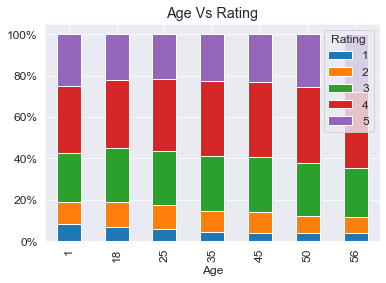

<Figure size 432x288 with 0 Axes>

In [67]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

dfMaster.groupby(['Age','Rating']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Age Vs Rating")
plt.show()
plt.savefig('Age Vs Rating Analysis.png')

# Analysis of Toy Story movie to find the ratings,age group and gender

In [68]:
# Toy Story
toystoryRating = dfMaster[dfMaster['Title'].str.contains('Toy Story') == True]
toystoryRating

MovieID               Title                       Genres  UserID  \
0              1    Toy Story (1995)  Animation|Children's|Comedy       1   
50          3114  Toy Story 2 (1999)  Animation|Children's|Comedy       1   
53             1    Toy Story (1995)  Animation|Children's|Comedy       6   
124            1    Toy Story (1995)  Animation|Children's|Comedy       8   
263            1    Toy Story (1995)  Animation|Children's|Comedy       9   
346         3114  Toy Story 2 (1999)  Animation|Children's|Comedy       9   
369            1    Toy Story (1995)  Animation|Children's|Comedy      10   
715         3114  Toy Story 2 (1999)  Animation|Children's|Comedy      10   
770            1    Toy Story (1995)  Animation|Children's|Comedy      18   
1075           1    Toy Story (1995)  Animation|Children's|Comedy      19   
1297        3114  Toy Story 2 (1999)  Animation|Children's|Comedy      19   
1330           1    Toy Story (1995)  Animation|Children's|Comedy      21   
1352           1    Toy Story (1995)  Animation|Children's|Comedy      23   
1656           1    Toy Story (1995)  Animation|Children's|Comedy      26   
1991        3114  Toy Story 2 (1999)  Animation|Children's|Comedy      26   
2056           1    Toy Story (1995)  Animation|Children's|Comedy      28   
2163           1    Toy Story (1995)  Animation|Children's|Comedy      34   
2327           1    Toy Story (1995)  Animation|Children's|Comedy      36   
2622        3114  Toy Story 2 (1999)  Animation|Children's|Comedy      36   
2678           1    Toy Story (1995)  Animation|Children's|Comedy      38   
2778           1    Toy Story (1995)  Animation|Children's|Comedy      44   
2971           1    Toy Story (1995)  Animation|Children's|Comedy      45   
3226        3114  Toy Story 2 (1999)  Animation|Children's|Comedy      45   
3268           1    Toy Story (1995)  Animation|Children's|Comedy      48   
3789        3114  Toy Story 2 (1999)  Animation|Children's|Comedy      48   
3866           1    Toy Story (1995)  Animation|Children's|Comedy      49   
3956        3114  Toy Story 2 (1999)  Animation|Children's|Comedy      49   
3974           1    Toy Story (1995)  Animation|Children's|Comedy      51   
3996        3114  Toy Story 2 (1999)  Animation|Children's|Comedy      51   
4014           1    Toy Story (1995)  Animation|Children's|Comedy      56   
4077        3114  Toy Story 2 (1999)  Animation|Children's|Comedy      56   
4081           1    Toy Story (1995)  Animation|Children's|Comedy      60   
4151           1    Toy Story (1995)  Animation|Children's|Comedy      65   
4250        3114  Toy Story 2 (1999)  Animation|Children's|Comedy      65   
4272           1    Toy Story (1995)  Animation|Children's|Comedy      68   
4344           1    Toy Story (1995)  Animation|Children's|Comedy      73   
4599           1    Toy Story (1995)  Animation|Children's|Comedy      75   
4765        3114  Toy Story 2 (1999)  Animation|Children's|Comedy      75   
4774           1    Toy Story (1995)  Animation|Children's|Comedy      76   
4861           1    Toy Story (1995)  Animation|Children's|Comedy      78   
4984        3114  Toy Story 2 (1999)  Animation|Children's|Comedy      78   
5001           1    Toy Story (1995)  Animation|Children's|Comedy      80   
5038        3114  Toy Story 2 (1999)  Animation|Children's|Comedy      80   
5049           1    Toy Story (1995)  Animation|Children's|Comedy      90   
5239        3114  Toy Story 2 (1999)  Animation|Children's|Comedy      90   
5274           1    Toy Story (1995)  Animation|Children's|Comedy      92   
5621        3114  Toy Story 2 (1999)  Animation|Children's|Comedy      92   
5704           1    Toy Story (1995)  Animation|Children's|Comedy      96   
5773        3114  Toy Story 2 (1999)  Animation|Children's|Comedy      96   
5785           1    Toy Story (1995)  Animation|Children's|Comedy      99   
5847        3114  Toy Story 2 (1999)  Animation|Children's|Comedy      99   
5892 

In [69]:
toystoryRating.groupby('Rating').size()

Rating
1      41
2     105
3     559
4    1413
5    1544
dtype: int64

In [70]:
toystory_data_group = toystoryRating.groupby('Rating')
toystory_data_group.agg({'Rating':'mean'})

Rating
Rating        
1            1
2            2
3            3
4            4
5            5

TOY STORY SPECIFIC RATING COUNT

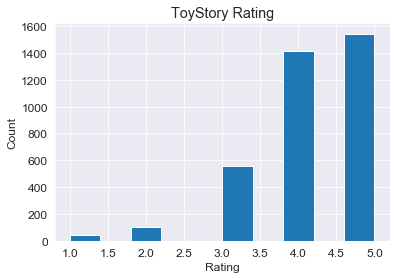

<Figure size 432x288 with 0 Axes>

In [71]:
plt.hist(x=toystoryRating['Rating'])
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("ToyStory Rating")
plt.show()
plt.savefig('ToyStoryRatings.png')
plt.show()

# Maximum rating achieved by Toy story movie is 5

In [72]:
dfRatings.head()

UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

In [73]:
viewership = pd.merge(dfRatings, dfUsers, how='left', left_on=['UserID'], right_on=['UserID'])

In [74]:
viewership.shape

(1000209, 8)

In [75]:
viewership.head()

UserID  MovieID  Rating  Timestamp Gender  Age  Occupation Zip-code
0       1     1193       5  978300760      F    1          10    48067
1       1      661       3  978302109      F    1          10    48067
2       1      914       3  978301968      F    1          10    48067
3       1     3408       4  978300275      F    1          10    48067
4       1     2355       5  978824291      F    1          10    48067

# Viewership analysis of Toy story movie

In [76]:
#select only 'Toystory' data
viewership_of_toystoryRating = viewership[viewership['MovieID'] == 1]
viewership_of_toystoryRating.shape

(2077, 8)

In [77]:
viewership_of_toystoryRating.head()

UserID  MovieID  Rating  Timestamp Gender  Age  Occupation Zip-code
40        1        1       5  978824268      F    1          10    48067
469       6        1       4  978237008      F   50           9    55117
581       8        1       4  978233496      M   25          12    11413
711       9        1       5  978225952      M   25          17    61614
837      10        1       5  978226474      F   35           1    95370

In [78]:
viewership_of_toystoryRating.groupby('Age').size()

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
dtype: int64

AGE CATEGORY RATING COUNT FOR TOY STORY MOVIE

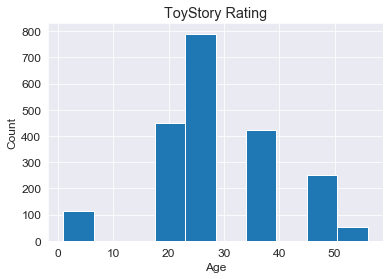

<Figure size 432x288 with 0 Axes>

In [79]:
plt.hist(x=viewership_of_toystoryRating['Age'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("ToyStory Rating")
plt.show()
plt.savefig('ToyStoryRatingsViewersAge.png')
plt.show()

# Age group Analysis. Viewers aged 25 years viewed Toystory movie mostly

RATING DISTRIBUTION IN TOY STORY VIEWERS COUNT 

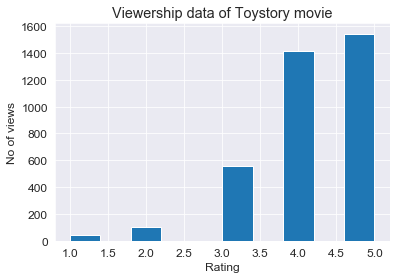

<Figure size 432x288 with 0 Axes>

In [80]:
plt.hist(x=toystoryRating['Rating'])
plt.xlabel("Rating")
plt.ylabel("No of views")
plt.title("Viewership data of Toystory movie")
plt.show()
plt.savefig('ToyStoryRatingsViewersRating.png')

# Analysis of Pleasantville movie Analysis

In [81]:
# Pleasantville
PleasantvilleRating = dfMaster[dfMaster['Title'].str.contains('Pleasantville') == True]
PleasantvilleRating

MovieID                 Title  Genres  UserID  Rating   Timestamp  \
38          2321  Pleasantville (1998)  Comedy       1       3   978302205   
97          2321  Pleasantville (1998)  Comedy       6       3   978237034   
647         2321  Pleasantville (1998)  Comedy      10       4   978227336   
1222        2321  Pleasantville (1998)  Comedy      19       4   978299636   
1920        2321  Pleasantville (1998)  Comedy      26       5   978139101   
2138        2321  Pleasantville (1998)  Comedy      28       4   978126422   
2542        2321  Pleasantville (1998)  Comedy      36       3   978063826   
2903        2321  Pleasantville (1998)  Comedy      44       4   978304306   
3159        2321  Pleasantville (1998)  Comedy      45       3   977990190   
3675        2321  Pleasantville (1998)  Comedy      48       3   978012882   
4059        2321  Pleasantville (1998)  Comedy      56       5   977939897   
4510        2321  Pleasantville (1998)  Comedy      73       3   977867842   
4737        2321  Pleasantville (1998)  Comedy      75       5   977853080   
4962        2321  Pleasantville (1998)  Comedy      78       4   978570767   
5198        2321  Pleasantville (1998)  Comedy      90       3   993872720   
6772        2321  Pleasantville (1998)  Comedy     118       3   977502253   
7987        2321  Pleasantville (1998)  Comedy     132       3   977428840   
8481        2321  Pleasantville (1998)  Comedy     136       1   977422460   
8866        2321  Pleasantville (1998)  Comedy     142       4   977352465   
9876        2321  Pleasantville (1998)  Comedy     148       4   977335378   
10863       2321  Pleasantville (1998)  Comedy     150       3   977304092   
11250       2321  Pleasantville (1998)  Comedy     151       4   992133840   
12456       2321  Pleasantville (1998)  Comedy     163       4   977213779   
13015       2321  Pleasantville (1998)  Comedy     169       4   977199240   
14963       2321  Pleasantville (1998)  Comedy     187       4   977232995   
15200       2321  Pleasantville (1998)  Comedy     190       2   977028091   
15530       2321  Pleasantville (1998)  Comedy     194       4   977015048   
16078       2321  Pleasantville (1998)  Comedy     195       5   977026682   
16596       2321  Pleasantville (1998)  Comedy     198       5   976980432   
17174       2321  Pleasantville (1998)  Comedy     202       4   976940137   
17724       2321  Pleasantville (1998)  Comedy     204       2   978050004   
17884       2321  Pleasantville (1998)  Comedy     213       4   976900356   
17983       2321  Pleasantville (1998)  Comedy     214       4   976900674   
18155       2321  Pleasantville (1998)  Comedy     220       4   976836467   
18362       2321  Pleasantville (1998)  Comedy     223       1   976903036   
18579       2321  Pleasantville (1998)  Comedy     224       5   976833434   
18963       2321  Pleasantville (1998)  Comedy     225       3   976831589   
19488       2321  Pleasantville (1998)  Comedy     232       3   976812886   
20339       2321  Pleasantville (1998)  Comedy     263       3   976652239   
21068       2321  Pleasantville (1998)  Comedy     271       5   979881145   
21430       2321  Pleasantville (1998)  Comedy     272       4   976695918   
23882       2321  Pleasantville (1998)  Comedy     302       4   976505721   
26096       2321  Pleasantville (1998)  Comedy     326       3   976423653   
26708       2321  Pleasantville (1998)  Comedy     329       3   977870350   
28094       2321  Pleasantville (1998)  Comedy     343       4  1033320462   
28533       2321  Pleasantville (1998)  Comedy     350       4   976326744   
29213       2321  Pleasantville (1998)  Comedy     352       5   976331778   
29787       2321  Pleasantville (1998)  Comedy     355       4   976676410   
30425       2321  Pleasantville (1998)  Comedy     368       5   981749863   
30584       2321  Pleasantville (1998)  Comedy     369       3   976309747   
30923       2321  Pleasantville

In [82]:
PleasantvilleRating.groupby('Rating').size()

Rating
1     21
2     91
3    323
4    506
5    217
dtype: int64

In [83]:
Pleasantville_data_group = PleasantvilleRating.groupby('Rating')
Pleasantville_data_group.agg({'Rating':'mean'})

Rating
Rating        
1            1
2            2
3            3
4            4
5            5

PLEASANTVILLE MOVIE RATING DISTRIBUTION IN PLEASANTVILLE VIEWERS GROUP

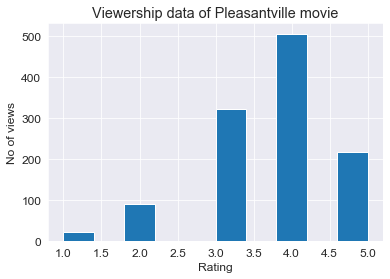

<Figure size 432x288 with 0 Axes>

In [84]:
plt.hist(x=PleasantvilleRating['Rating'])
plt.xlabel("Rating")
plt.ylabel("No of views")
plt.title("Viewership data of Pleasantville movie")
plt.show()
plt.savefig('PleasantvilleRatingsViewersRating.png')

# Maximum rating achieved by Pleasantville movie is 4

In [85]:
viewership = pd.merge(dfRatings, dfUsers, how='left', left_on=['UserID'], right_on=['UserID'])
viewership=viewership.drop(['Timestamp', 'Zip-code'], axis=1)

In [86]:
viewership_of_Pleasantville = viewership[viewership['MovieID'] == 2321]
viewership_of_Pleasantville.shape

(1158, 6)

In [87]:
viewership_of_Pleasantville.head()

UserID  MovieID  Rating Gender  Age  Occupation
20         1     2321       3      F    1          10
150        2     2321       3      M   56          16
515        6     2321       3      F   50           9
980       10     2321       4      F   35           1
1256      11     2321       3      F   25           1

In [88]:
viewership_of_Pleasantville.groupby('Age').size()

Age
1      58
18    253
25    453
35    200
45     84
50     75
56     35
dtype: int64

GROUPING BY AGE GROUP IN PLEASANTVILLE VIEWERSHIP

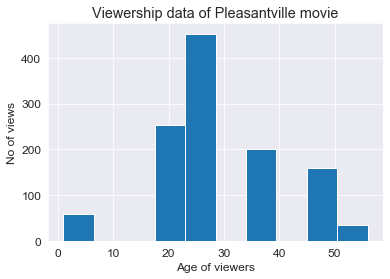

<Figure size 432x288 with 0 Axes>

In [89]:
plt.hist(x=PleasantvilleRating['Age'])
plt.xlabel("Age of viewers")
plt.ylabel("No of views")
plt.title("Viewership data of Pleasantville movie")
plt.show()
plt.savefig('PleasantvilleRatingsViewersRating.png')

# Viewers aged between 20 to 30 viewed Pleasantville mostly

In [90]:
movie_rating = dfRatings.groupby(['MovieID'], as_index=False)
average_movie_ratings = movie_rating.agg({'Rating':'mean'})
top_10_movies = average_movie_ratings.sort_values('Rating', ascending=False).head(10)
top_10_movies

MovieID  Rating
926       989     5.0
3635     3881     5.0
1652     1830     5.0
3152     3382     5.0
744       787     5.0
3054     3280     5.0
3367     3607     5.0
3010     3233     5.0
2955     3172     5.0
3414     3656     5.0

# Segmenting viewers with top ratings and movies

In [91]:
#The below list shows top 10 movies by viewership data
pd.merge(top_10_movies, dfMovies, how='left', left_on=['MovieID'], right_on=['MovieID'])

MovieID  Rating                                      Title  \
0      989     5.0  Schlafes Bruder (Brother of Sleep) (1995)   
1     3881     5.0                   Bittersweet Motel (2000)   
2     1830     5.0                    Follow the Bitch (1998)   
3     3382     5.0                     Song of Freedom (1936)   
4      787     5.0         Gate of Heavenly Peace, The (1995)   
5     3280     5.0                           Baby, The (1973)   
6     3607     5.0                   One Little Indian (1973)   
7     3233     5.0                       Smashing Time (1967)   
8     3172     5.0                    Ulysses (Ulisse) (1954)   
9     3656     5.0                               Lured (1947)   

                 Genres  
0                 Drama  
1           Documentary  
2                Comedy  
3                 Drama  
4           Documentary  
5                Horror  
6  Comedy|Drama|Western  
7                Comedy  
8             Adventure  
9                 Crime

# Ratings of particular User

In [92]:
# User Id/Rating  for 3000
user_rating_data = dfRatings[dfRatings['UserID']==3000]
user_rating_data.head()

UserID  MovieID  Rating  Timestamp
487650    3000     2987       4  970620765
487651    3000     2990       3  970620361
487652    3000     3793       3  970620857
487653    3000     1252       4  970620744
487654    3000     2997       4  970620561

# Gender Vs Rating

RATING DISTRIBUTION IN GENDER VS USERS COUNT

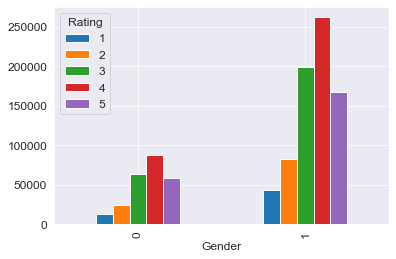

In [93]:
dfMaster.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

# Age Vs Rating

RATING DISTRIBUTION IN AGE GROUP VS USERS COUNT

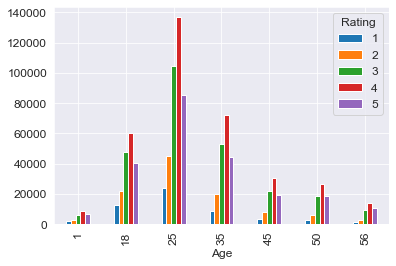

In [94]:
dfMaster.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

# Occupation Vs Rating

RATING DISTRIBUTION IN OCCUPATION VS USERS COUNT

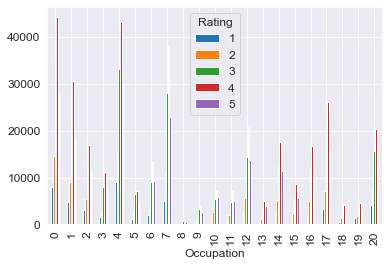

In [95]:
dfMaster.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

# GENERAL APPROACH TOWARDS FEATURE SELECTION AND ALGORITHM 

# Selecting  Features

In [96]:
# Dataset Preparation for Modelling
dfRatings = pd.read_csv("ratings.dat",sep="::",names=["UserID","MovieID","Rating","Timestamp"],engine='python')
dfMovies = pd.read_csv("movies.dat",sep="::",names=["MovieID","Title","Genres"],engine='python')
dfUsers = pd.read_csv("users.dat",sep="::",names=["UserID","Gender","Age","Occupation","Zip-code"],engine='python')
dfMovieRatings = dfMovies.merge(dfRatings,on='MovieID',how='inner')
dfMaster = dfMovieRatings.merge(dfUsers,on="UserID",how='inner')
dfMaster['Gender'] = dfMaster.Gender.str.replace('M','1')
dfMaster['Gender'] = dfMaster.Gender.str.replace('F','0')
dfMaster['Gender'] = dfMaster.Gender.astype(int)
ratingsOneHot = dfMaster['Genres'].str.get_dummies("|")
dfMaster = pd.concat([dfMaster,ratingsOneHot],axis=1)
dfMaster[["title","Year"]] = dfMaster.Title.str.extract("(.)\s\((.\d+)",expand=True)
dfMaster = dfMaster.drop(columns=["title"])
dfMaster['Year'] = dfMaster.Year.astype(int)
dfMaster.head()

MovieID                                      Title  \
0        1                           Toy Story (1995)   
1       48                          Pocahontas (1995)   
2      150                           Apollo 13 (1995)   
3      260  Star Wars: Episode IV - A New Hope (1977)   
4      527                    Schindler's List (1993)   

                                 Genres  UserID  Rating  Timestamp  Gender  \
0           Animation|Children's|Comedy       1       5  978824268       0   
1  Animation|Children's|Musical|Romance       1       5  978824351       0   
2                                 Drama       1       5  978301777       0   
3       Action|Adventure|Fantasy|Sci-Fi       1       4  978300760       0   
4                             Drama|War       1       5  978824195       0   

   Age  Occupation Zip-code  Action  Adventure  Animation  Children's  Comedy  \
0    1          10    48067       0          0          1           1       1   
1    1          10    48067       0          0          1           1       0   
2    1          10    48067       0          0          0           0       0   
3    1          10    48067       1          1          0           0       0   
4    1          10    48067       0          0          0           0       0   

   Crime  Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  \
0      0            0      0        0          0       0        0        0   
1      0            0      0        0          0       0        1        0   
2      0            0      1        0          0       0        0        0   
3      0            0      0        1          0       0        0        0   
4      0            0      1        0          0       0        0        0   

   Romance  Sci-Fi  Thriller  War  Western  Year  
0        0       0         0    0        0  1995  
1        1       0         0    0        0  1995  
2        0       0         0    0        0  1995  
3        0       1         0    0        0  1977  
4        0       0         0    1        0  1993

In [97]:
dfMaster.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'Year'],
      dtype='object')

In [98]:
#Use the following features:
features = dfMaster[[ 'Gender',
       'Age', 'Occupation','Gender', 'Action', 'Adventure', 'Animation',
       "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western']].values

In [99]:
#Use rating as label
labels = dfMaster[['Rating']].values

In [100]:
features

array([[ 0,  1, 10, ...,  0,  0,  0],
       [ 0,  1, 10, ...,  0,  0,  0],
       [ 0,  1, 10, ...,  0,  0,  0],
       ...,
       [ 1, 25,  4, ...,  0,  0,  0],
       [ 1, 25,  4, ...,  1,  0,  0],
       [ 1, 25,  4, ...,  0,  0,  0]], dtype=int64)

In [101]:
labels

array([[5],
       [5],
       [5],
       ...,
       [5],
       [3],
       [5]], dtype=int64)

# Train - Test Split

In [102]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.2,random_state=None)

In [103]:
train

array([[ 1, 25,  7, ...,  0,  0,  0],
       [ 0, 25,  1, ...,  0,  0,  0],
       [ 1, 25, 14, ...,  0,  0,  0],
       ...,
       [ 1, 18,  5, ...,  0,  0,  0],
       [ 0, 35,  1, ...,  0,  0,  0],
       [ 1, 25,  0, ...,  0,  0,  0]], dtype=int64)

In [104]:
test

array([[ 1, 50, 16, ...,  0,  0,  0],
       [ 1, 35,  7, ...,  0,  0,  0],
       [ 1, 25,  0, ...,  1,  0,  0],
       ...,
       [ 1, 45,  7, ...,  0,  0,  0],
       [ 1, 18,  4, ...,  0,  0,  0],
       [ 1, 45,  1, ...,  1,  0,  0]], dtype=int64)

In [105]:
train_labels

array([[4],
       [4],
       [4],
       ...,
       [5],
       [3],
       [2]], dtype=int64)

In [106]:
test_labels

array([[1],
       [5],
       [4],
       ...,
       [5],
       [5],
       [5]], dtype=int64)

# Logistic Regression

In [107]:
# Logistic Regression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


34.94

# K Nearest Neighbors

In [108]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


29.17

# Stochastic Gradient Boosting

In [109]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, train_labels)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_labels) * 100, 2)
acc_sgd

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


34.8

# Decision Tree

In [110]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

41.14

# Random Forest

In [111]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


41.14

In [112]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest',
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest, 
              acc_sgd, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

Model  Score
2               Random Forest  41.14
4               Decision Tree  41.14
1         Logistic Regression  34.94
3  Stochastic Gradient Decent  34.80
0                         KNN  29.17

# STRATEGIC APPROACH IN FEATURE SELECTION AND ALGORITHMS

In [113]:
print(dfMaster.columns.tolist())

['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender', 'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'Year']


In [114]:
num_bin_cat_features = [ 'Rating', 'Gender', 'Age', 'Occupation', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


CORRELATION BETWEEN FEATURES

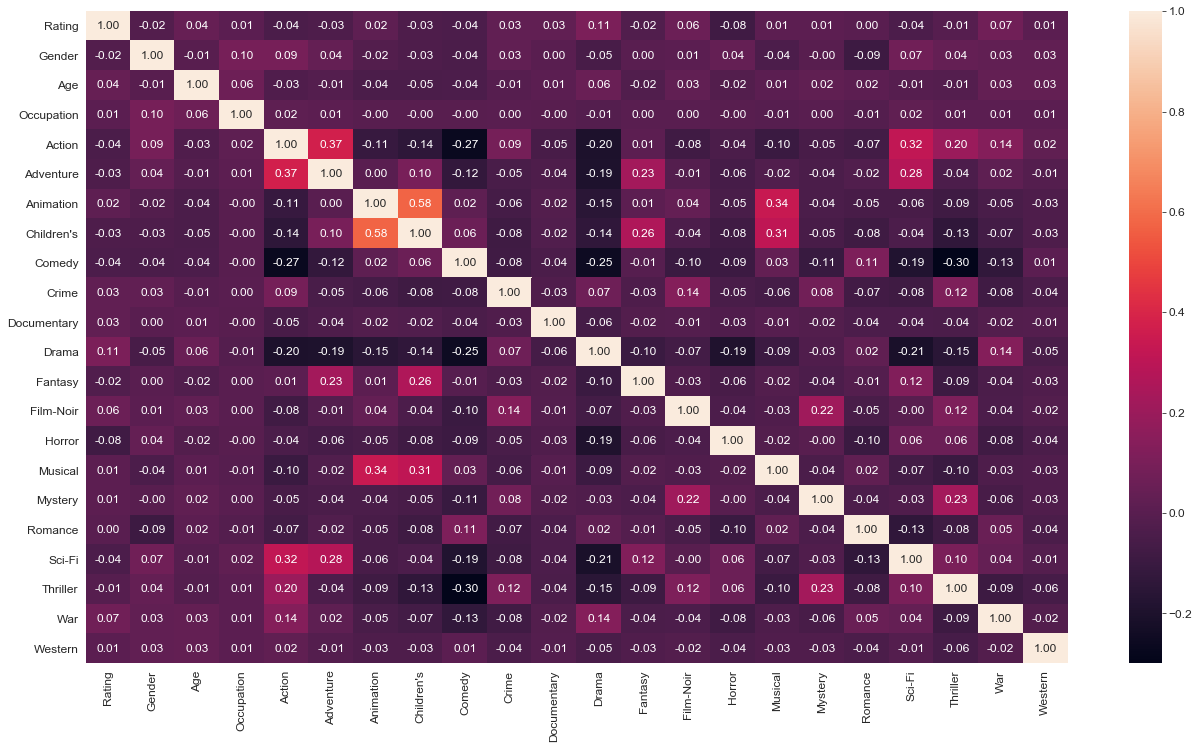

In [115]:
# plotting heatmap
corr = dfMaster[num_bin_cat_features].corr(method='kendall')
plt.figure(figsize=(22,12))
sns.heatmap(corr, annot=True, fmt=".2f")

In [116]:

#dropping columns
columns_to_drop = ['MovieID', 'Title', 'Genres', 'UserID', 'Timestamp', 'Zip-code', 'Year']
dfMaster.drop(columns_to_drop, axis=1, inplace=True)

In [117]:
#checking data correaltion of all the features with Rating
corr = dfMaster.corr()
print(corr['Rating'].sort_values(ascending=False))

Rating         1.000000
Drama          0.122561
War            0.075688
Film-Noir      0.060259
Age            0.056869
Crime          0.033446
Documentary    0.028098
Animation      0.019670
Mystery        0.015848
Musical        0.015643
Romance        0.009644
Western        0.007311
Occupation     0.006753
Thriller      -0.004806
Gender        -0.019861
Fantasy       -0.023312
Adventure     -0.036718
Comedy        -0.039622
Children's    -0.039829
Sci-Fi        -0.044487
Action        -0.047633
Horror        -0.094353
Name: Rating, dtype: float64


# DATA MODELLING

In [118]:
numerical_features=['Rating', 'Gender', 'Age', 'Occupation', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

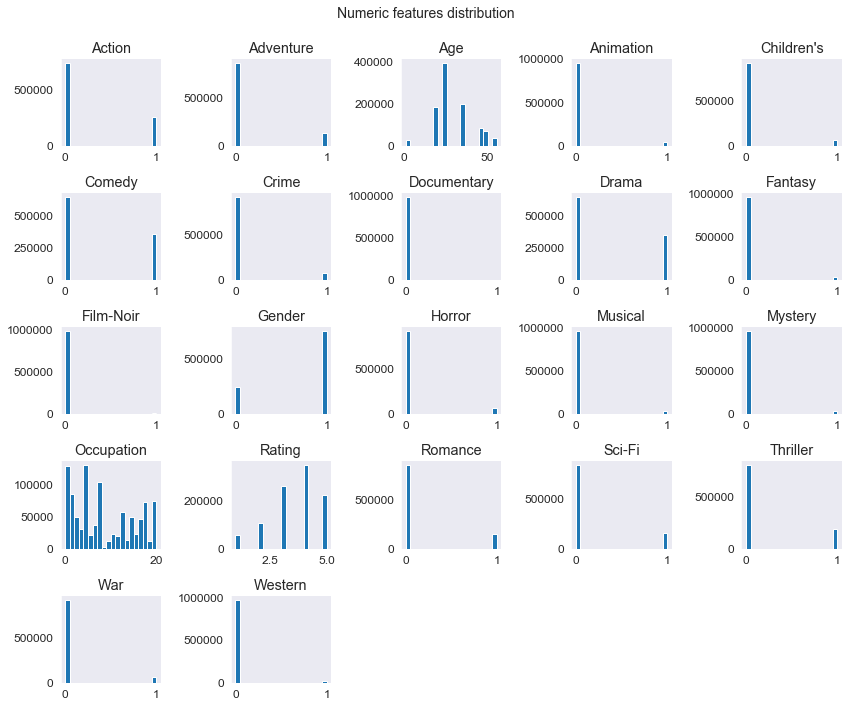

In [119]:
#checking the distribution of all numerical features
dfMaster[numerical_features].hist(figsize=(12, 10), bins=20, grid=False)
sns.despine()
plt.suptitle('Numeric features distribution', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])

In [120]:
# Log-transforming columns 
for column in numerical_features:
    dfMaster[column] = dfMaster[column].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    dfMaster[column] = np.log(dfMaster[column])

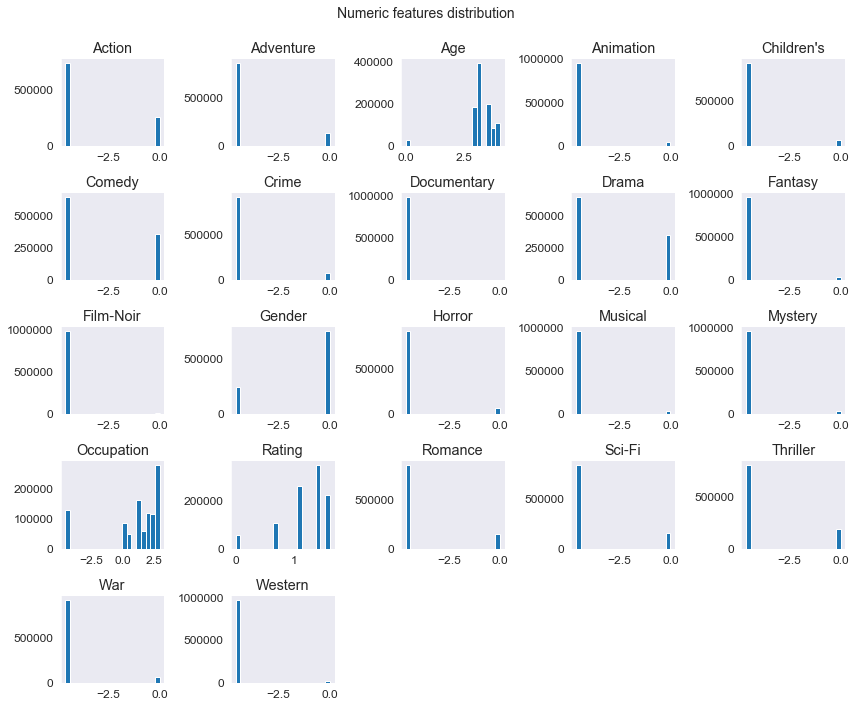

In [121]:
#checking the distribution
dfMaster[numerical_features].hist(figsize=(12, 10), bins=20, grid=False)
sns.despine()
plt.suptitle('Numeric features distribution', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])

In [122]:
#Training features
x = dfMaster.drop('Rating', axis=1)
#training labels
y = dfMaster.Rating

In [123]:
# Scaling all the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=list(x.columns))

In [124]:
#Splitting data into train and test set in the ratio 8:2
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [125]:
x_train.head()

Gender       Age  Occupation    Action  Adventure  Animation  \
136800  0.571790  0.839603    0.675038 -0.588749  -0.393236  -0.212702   
809312  0.571790 -0.077630   -0.448324  1.698516   2.543003  -0.212702   
967469 -1.748894 -0.077630    0.314371 -0.588749  -0.393236  -0.212702   
844968  0.571790  1.180865    0.731878  1.698516   2.543003  -0.212702   
506967  0.571790  0.839603   -0.153274 -0.588749  -0.393236  -0.212702   

        Children's    Comedy    Crime  Documentary     Drama   Fantasy  \
136800   -0.278899 -0.744322 -0.29393    11.200387 -0.740998 -0.194062   
809312   -0.278899 -0.744322 -0.29393    -0.089283 -0.740998  5.152980   
967469    3.585526  1.343505 -0.29393    -0.089283  1.349531 -0.194062   
844968   -0.278899 -0.744322 -0.29393    -0.089283 -0.740998 -0.194062   
506967   -0.278899  1.343505 -0.29393    -0.089283 -0.740998 -0.194062   

        Film-Noir    Horror   Musical   Mystery   Romance    Sci-Fi  Thriller  \
136800   -0.13637 -0.287549 -0.208142 -0.204575 -0.415944 -0.431981 -0.483756   
809312   -0.13637 -0.287549 -0.208142 -0.204575 -0.415944 -0.431981 -0.483756   
967469   -0.13637 -0.287549 -0.208142 -0.204575 -0.415944 -0.431981 -0.483756   
844968   -0.13637 -0.287549 -0.208142 -0.204575  2.404167 -0.431981 -0.483756   
506967   -0.13637 -0.287549 -0.208142 -0.204575 -0.415944 -0.431981 -0.483756   

             War   Western  
136800 -0.271205 -0.145311  
809312 -0.271205 -0.145311  
967469 -0.271205 -0.145311  
844968 -0.271205 -0.145311  
506967 -0.271205 -0.145311

In [126]:
x_test.head()

Gender       Age  Occupation    Action  Adventure  Animation  \
382276  0.571790 -0.590256    0.141777 -0.588749  -0.393236  -0.212702   
712314  0.571790  0.447431    0.757684 -0.588749  -0.393236  -0.212702   
415052  0.571790  0.447431    0.731878  1.698516  -0.393236  -0.212702   
465169  0.571790  0.447431   -2.408599 -0.588749  -0.393236  -0.212702   
270413 -1.748894  0.447431    0.236762 -0.588749  -0.393236  -0.212702   

        Children's    Comedy    Crime  Documentary     Drama   Fantasy  \
382276   -0.278899 -0.744322 -0.29393    -0.089283  1.349531 -0.194062   
712314   -0.278899  1.343505 -0.29393    -0.089283 -0.740998 -0.194062   
415052   -0.278899 -0.744322 -0.29393    -0.089283 -0.740998 -0.194062   
465169   -0.278899 -0.744322 -0.29393    -0.089283 -0.740998 -0.194062   
270413   -0.278899 -0.744322 -0.29393    -0.089283 -0.740998 -0.194062   

        Film-Noir    Horror   Musical   Mystery   Romance    Sci-Fi  Thriller  \
382276   -0.13637 -0.287549 -0.208142 -0.204575 -0.415944 -0.431981  2.067157   
712314   -0.13637 -0.287549 -0.208142 -0.204575 -0.415944 -0.431981 -0.483756   
415052   -0.13637 -0.287549 -0.208142 -0.204575 -0.415944 -0.431981  2.067157   
465169   -0.13637 -0.287549 -0.208142 -0.204575 -0.415944  2.314919 -0.483756   
270413   -0.13637 -0.287549 -0.208142 -0.204575 -0.415944 -0.431981  2.067157   

             War   Western  
382276 -0.271205 -0.145311  
712314 -0.271205 -0.145311  
415052 -0.271205 -0.145311  
465169 -0.271205 -0.145311  
270413 -0.271205 -0.145311

In [127]:
y_train.head()

136800    1.609438
809312    1.098612
967469    1.098612
844968    1.098612
506967    1.386294
Name: Rating, dtype: float64

In [128]:
y_test.head()

382276    1.386294
712314    1.609438
415052    1.386294
465169    1.098612
270413    0.693147
Name: Rating, dtype: float64

In [129]:
#Creating a function to evaluate the model, RMSE, R2 and the time taken
def evaluate_model(time_taken,train_rmse,test_rmse,train_r2,test_r2):
    print(f"Time taken to run:"+str(time_taken)+" minutes")
    print("\nTraining RMSE:", train_rmse)
    print("Validation RMSE:", test_rmse)
    print("\nTraining r2:", train_r2)
    print("Validation r2:", test_r2)

# LINEAR REGRESSION

In [130]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time

train_start_time = time.time()
lr_model=LinearRegression()
#train the model using train set
lr_model.fit(x_train,y_train)
y_train_pred_lr=lr_model.predict(x_train)
#make predictions using the test set
y_test_pred_lr=lr_model.predict(x_test)
train_end_time = time.time()

#calculating time taken, train rmse, test rmse, train r2 and test r2
time_taken_lr = round((train_end_time - train_start_time)/60,1)
train_rmse_lr = round(np.sqrt(mean_squared_error(y_train, y_train_pred_lr)),4)
test_rmse_lr = round(np.sqrt(mean_squared_error(y_test, y_test_pred_lr)),4)
train_r2_lr = round(r2_score(y_train, y_train_pred_lr),4)
test_r2_lr = round(r2_score(y_test, y_test_pred_lr),4)
#printing the results
evaluate_model(time_taken_lr,train_rmse_lr,test_rmse_lr,train_r2_lr,test_r2_lr)

Time taken to run:0.0 minutes

Training RMSE: 0.3943
Validation RMSE: 0.3946

Training r2: 0.035
Validation r2: 0.0347


# DECISION TREE REGRESSION

In [131]:
#Prepare a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

train_start_time = time.time()
dt_model=DecisionTreeRegressor()
#train the model using train set
dt_model.fit(x_train,y_train)
y_train_pred_dt=dt_model.predict(x_train)
#make predictions using the test set
y_test_pred_dt=dt_model.predict(x_test)
train_end_time = time.time()
#calculating time taken, train rmse, test rmse, train r2 and test r2
time_taken_dt = round((train_end_time - train_start_time)/60,1)
train_rmse_dt = round(np.sqrt(mean_squared_error(y_train, y_train_pred_dt)),4)
test_rmse_dt = round(np.sqrt(mean_squared_error(y_test, y_test_pred_dt)),4)
train_r2_dt = round(r2_score(y_train, y_train_pred_dt),4)
test_r2_dt = round(r2_score(y_test, y_test_pred_dt),4)
#printing the results
evaluate_model(time_taken_dt,train_rmse_dt,test_rmse_dt,train_r2_dt,test_r2_dt)

Time taken to run:0.1 minutes

Training RMSE: 0.3705
Validation RMSE: 0.3918

Training r2: 0.148
Validation r2: 0.0483


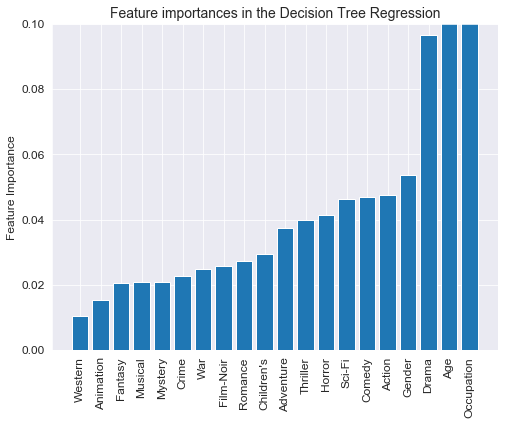

In [132]:
#Calculating important features of the model
model_weights = pd.DataFrame(dt_model.feature_importances_, columns=['weight'], index=x_train.columns)
model_weights.sort_values('weight', inplace=True)
#plotting top 20 features
plt.figure(figsize=(8,6))
plt.bar(model_weights.index[-20:], model_weights.weight[-20:], align='center') 
plt.title("Feature importances in the Decision Tree Regression", fontsize=14)
plt.ylabel("Feature Importance")
plt.ylim(0,0.1)
plt.xticks(range(20),rotation=90)
plt.margins(y=0.01)
plt.show()

In [133]:
#parameters used
print(dt_model.get_params())

{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


IMPLEMENTING GRIDSEARCH CV

In [144]:
#implementing gridsearchcv
from sklearn.model_selection import GridSearchCV

## Hyper Parameter Optimization

param_grid={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

#param_grid = {'max_depth': [2, 3, 4, 5, 6], 'min_samples_leaf': [0.01,0.1,1,2]}

# Instantiate the grid search model
grid_search = GridSearchCV(dt_model, param_grid=param_grid, scoring='neg_median_absolute_error', cv=3)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)
#get best parameters
grid_search.best_params_

ValueError: Invalid parameter colsample_bytree for estimator DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.

# TUNED DECISION TREE

In [ ]:
#tuned decision tree
train_start_time = time.time()
#train the model using train set and hyper parameters
dt_model_t=DecisionTreeRegressor(max_depth=2,min_samples_leaf=1)
dt_model_t.fit(x_train,y_train)
y_train_pred_dt_t=dt_model_t.predict(x_train)
#make predictions using the test set
y_test_pred_dt_t=dt_model_t.predict(x_test)
train_end_time = time.time()
#calculating time taken, train rmse, test rmse, train r2 and test r2
time_taken_dt_t = round((train_end_time - train_start_time)/60,1)
train_rmse_dt_t = round(np.sqrt(mean_squared_error(y_train, y_train_pred_dt_t)),4)
test_rmse_dt_t = round(np.sqrt(mean_squared_error(y_test, y_test_pred_dt_t)),4)
train_r2_dt_t = round(r2_score(y_train, y_train_pred_dt_t),4)
test_r2_dt_t = round(r2_score(y_test, y_test_pred_dt_t),4)
#printing the results
evaluate_model(time_taken_dt_t,train_rmse_dt_t,test_rmse_dt_t,train_r2_dt_t,test_r2_dt_t)

In [ ]:
#Calculating important features of the model
model_weights = pd.DataFrame(dt_model_t.feature_importances_, columns=['weight'], index=x_train.columns)
model_weights.sort_values('weight', inplace=True)
#plotting top 20 features
plt.figure(figsize=(8,6))
plt.bar(model_weights.index[-20:], model_weights.weight[-20:], align='center') 
plt.title("Feature importances in the Tuned Decision tree model", fontsize=14)
plt.ylabel("Feature Importance")
plt.ylim(0,0.1)
plt.xticks(range(20),rotation=90)
plt.margins(y=0.01)
plt.show()

# RANDOM FOREST REGRESSION

In [ ]:
#Prepare Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
train_start_time= time.time()
rf_model=RandomForestRegressor()
#train the model using train set
rf_model.fit(x_train,y_train)
y_train_pred_rf=rf_model.predict(x_train)
#make predictions using the test set
y_test_pred_rf=rf_model.predict(x_test)
train_end_time = time.time()
#calculating time taken, train rmse, test rmse, train r2 and test r2
time_taken_rf = round((train_end_time - train_start_time)/60,1)
train_rmse_rf = round(np.sqrt(mean_squared_error(y_train, y_train_pred_rf)),4)
test_rmse_rf = round(np.sqrt(mean_squared_error(y_test, y_test_pred_rf)),4)#test rmse
train_r2_rf = round(r2_score(y_train, y_train_pred_rf),4)
test_r2_rf = round(r2_score(y_test, y_test_pred_rf),4)#test r2 score
#printing the results
evaluate_model(time_taken_rf,train_rmse_rf,test_rmse_rf,train_r2_rf,test_r2_rf)

In [ ]:
#parameters used
print(rf_model.get_params())

In [ ]:
#implementing gridsearchcv
param_grid = {'random_state': [21,42],
            'n_estimators': [100,250]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_model, 
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2, 
                           scoring = 'neg_median_absolute_error')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)
#get best parameters
grid_search.best_params_

In [ ]:
#Calculating important features of the model
model_weights = pd.DataFrame(rf_model.feature_importances_, columns=['weight'], index=x_train.columns)
model_weights.sort_values('weight', inplace=True)
#plotting top 20 features
plt.figure(figsize=(8,6))
plt.bar(model_weights.index[-20:], model_weights.weight[-20:], align='center') 
plt.title("Feature importances in the Random Forest model", fontsize=14)
plt.ylabel("Feature Importance")
plt.ylim(0,0.1)
plt.xticks(range(20),rotation=90)
plt.margins(y=0.01)
plt.show()

# TUNED RANDOM FOREST

In [ ]:
#tuned random forest
train_start_time = time.time()
#train the model using train set and hyper parameters 
rf_model_t=RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model_t.fit(x_train,y_train)
y_train_pred_rf_t=rf_model_t.predict(x_train)
#make predictions using the test set
y_test_pred_rf_t=rf_model_t.predict(x_test)
train_end_time = time.time()
#calculating time taken, train rmse, test rmse, train r2 and test r2
time_taken_rf_t = round((train_end_time - train_start_time)/60,1)
train_rmse_rf_t = round(np.sqrt(mean_squared_error(y_train, y_train_pred_rf_t)),4)
test_rmse_rf_t = round(np.sqrt(mean_squared_error(y_test, y_test_pred_rf_t)),4)#test rmse
train_r2_rf_t = round(r2_score(y_train, y_train_pred_rf_t),4)
test_r2_rf_t = round(r2_score(y_test, y_test_pred_rf_t),4)#test r2 score
#printing the results
evaluate_model(time_taken_rf_t,train_rmse_rf_t,test_rmse_rf_t,train_r2_rf_t,test_r2_rf_t)

In [ ]:
#Calculating important features of the model
model_weights = pd.DataFrame(rf_model_t.feature_importances_, columns=['weight'], index=x_train.columns)
model_weights.sort_values('weight', inplace=True)
#plotting top 20 features
plt.figure(figsize=(8,6))
plt.bar(model_weights.index[-20:], model_weights.weight[-20:], align='center') 
plt.title("Feature importances in the Tuned Random Forest model", fontsize=14)
plt.ylabel("Feature Importance")
plt.ylim(0,0.1)
plt.xticks(range(20),rotation=90)
plt.margins(y=0.01)
plt.show()

# XGB REGRESSOR

In [ ]:
#xgb regressor
import xgboost as xgb
train_start_time = time.time()
#train the model using train set
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train, y_train)
y_train_pred_xgb = xgb_model.predict(x_train)
#make predictions using the test set
y_test_pred_xgb = xgb_model.predict(x_test)
train_end_time = time.time()
#calculating time taken, train rmse, test rmse, train r2 and test r2
time_taken_xgb = round((train_end_time - train_start_time)/60,1)
train_rmse_xgb = round(np.sqrt(mean_squared_error(y_train, y_train_pred_xgb)),4)
test_rmse_xgb = round(np.sqrt(mean_squared_error(y_test, y_test_pred_xgb)),4)
train_r2_xgb = round(r2_score(y_train, y_train_pred_xgb),4)
test_r2_xgb = round(r2_score(y_test, y_test_pred_xgb),4)
#printing the results
evaluate_model(time_taken_xgb,train_rmse_xgb,test_rmse_xgb,train_r2_xgb,test_r2_xgb)

In [ ]:
#parameters used
print(xgb_model.get_params())

In [ ]:
#implementing gridsearchcv
param_grid = {'xgbregressor__learning_rate': [0.1,0.01], 
              'xgbregressor__max_depth': [5,7,9],
              'xgbregressor__n_estimators': [500,900]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgb_model,
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2, 
                           scoring = 'neg_median_absolute_error')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)
#get best parameters
grid_search.best_params_

# TUNED XGB MODEL

In [ ]:
#tuned xgb model
train_start_time = time.time()
xgb_model_t = xgb.XGBRegressor(max_depth=5,n_estimators=500,learning_rate=0.1)
#train the model using train set
xgb_model_t.fit(x_train, y_train)
y_train_pred_xgb_t = xgb_model_t.predict(x_train)
#make predictions using the test set
y_test_pred_xgb_t = xgb_model_t.predict(x_test)
train_end_time = time.time()
#calculating time taken, train rmse, test rmse, train r2 and test r2
time_taken_xgb_t = round((train_end_time - train_start_time)/60,1)
train_rmse_xgb_t = round(np.sqrt(mean_squared_error(y_train, y_train_pred_xgb_t)),4)
test_rmse_xgb_t = round(np.sqrt(mean_squared_error(y_test, y_test_pred_xgb_t)),4)
train_r2_xgb_t = round(r2_score(y_train, y_train_pred_xgb_t),4)
test_r2_xgb_t = round(r2_score(y_test, y_test_pred_xgb_t),4)
#printing the results
evaluate_model(time_taken_xgb_t,train_rmse_xgb_t,test_rmse_xgb_t,train_r2_xgb_t,test_r2_xgb_t)

In [ ]:
#checking the importance of different features of the model
model_weights = pd.DataFrame(xgb_model_t.feature_importances_, columns=['weight'], index=x_train.columns)
model_weights.sort_values('weight', inplace=True)
model_weights

In [ ]:
#plotting top 20 features of xgb model
plt.figure(figsize=(8,6))
plt.bar(model_weights.index[-20:], model_weights.weight[-20:], align='center') 
plt.title("Feature importances in the Tuned XGBoost model", fontsize=14)
plt.ylabel("Feature Importance")
plt.ylim(0,0.1)
plt.xticks(range(20),rotation=90)
plt.margins(y=0.01)
plt.show()

# RMSE AND R2 COMPARISON

In [ ]:
#plotting rmse of all models
label = ['LR', 'DT', 'Tuned DT', 'RF', 'Tuned RF', 'XGB', 'Tuned XGB']#labels
rmse = [test_rmse_lr, test_rmse_dt, test_rmse_dt_t, test_rmse_rf, test_rmse_rf_t, test_rmse_xgb, test_rmse_xgb_t]#values
r2_score = [test_r2_lr, test_r2_dt, test_r2_dt_t, test_r2_rf, test_r2_rf_t, test_r2_xgb, test_r2_xgb_t]
index = np.arange(len(label))
plt.bar(index, rmse, color="r")
plt.xlabel('Models', fontsize=10)
plt.ylabel('RMSE', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.show()
#plotting r2 score of all models
label = ['LR', 'DT', 'Tuned DT', 'RF', 'Tuned RF', 'XGB', 'Tuned XGB']#labels
rmse = [test_rmse_lr, test_rmse_dt, test_rmse_dt_t, test_rmse_rf, test_rmse_rf_t, test_rmse_xgb, test_rmse_xgb_t]#values
r2_score = [test_r2_lr, test_r2_dt, test_r2_dt_t, test_r2_rf, test_r2_rf_t, test_r2_xgb, test_r2_xgb_t]
index = np.arange(len(label))
plt.bar(index, r2_score, color="c")
plt.xlabel('Models', fontsize=10)
plt.ylabel('R2 Score', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=30)
plt.show()